# Cheatsheet

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

# Read data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Python optimisation variables
learning_rate = 0.1
epochs = 50
batch_size = 100

# declare the training data placeholders
# input x - for 28 x 28 pixels = 784
x = tf.placeholder(tf.float32, [None, 784])
# now declare the output data placeholder - 10 digits
y = tf.placeholder(tf.float32, [None, 10])

# now declare the weights connecting the input to the hidden layer
W1 = tf.Variable(tf.random_normal([784, 300], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([300]), name='b1')
W2 = tf.Variable(tf.random_normal([300, 10], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([10]), name='b2')

In [3]:
# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(x, W1), b1)
hidden_out = tf.nn.relu(hidden_out)
y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))
y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))

# add an optimiser
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [4]:
# start the session
sess = tf.Session()
# initialise the variables
sess.run(init_op)
total_batch = int(len(mnist.train.labels) / batch_size)
for epoch in range(epochs):
    avg_cost = 0
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
        _, c = sess.run([optimiser, cross_entropy], feed_dict={x: batch_x, y: batch_y})
        avg_cost += c / total_batch
    print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

Epoch: 1 cost = 0.794
Epoch: 2 cost = 0.414
Epoch: 3 cost = 0.311
Epoch: 4 cost = 0.248
Epoch: 5 cost = 0.208
Epoch: 6 cost = 0.177
Epoch: 7 cost = 0.155
Epoch: 8 cost = 0.137
Epoch: 9 cost = 0.121
Epoch: 10 cost = 0.110
Epoch: 11 cost = 0.098
Epoch: 12 cost = 0.089
Epoch: 13 cost = 0.080
Epoch: 14 cost = 0.074
Epoch: 15 cost = 0.068
Epoch: 16 cost = 0.062
Epoch: 17 cost = 0.056
Epoch: 18 cost = 0.052
Epoch: 19 cost = 0.048
Epoch: 20 cost = 0.044
Epoch: 21 cost = 0.041
Epoch: 22 cost = 0.038
Epoch: 23 cost = 0.035
Epoch: 24 cost = 0.032
Epoch: 25 cost = 0.030
Epoch: 26 cost = 0.028
Epoch: 27 cost = 0.025
Epoch: 28 cost = 0.024
Epoch: 29 cost = 0.022
Epoch: 30 cost = 0.021
Epoch: 31 cost = 0.019
Epoch: 32 cost = 0.018
Epoch: 33 cost = 0.017
Epoch: 34 cost = 0.016
Epoch: 35 cost = 0.015
Epoch: 36 cost = 0.014
Epoch: 37 cost = 0.013
Epoch: 38 cost = 0.013
Epoch: 39 cost = 0.012
Epoch: 40 cost = 0.011
Epoch: 41 cost = 0.011
Epoch: 42 cost = 0.010
Epoch: 43 cost = 0.010
Epoch: 44 cost = 0.0

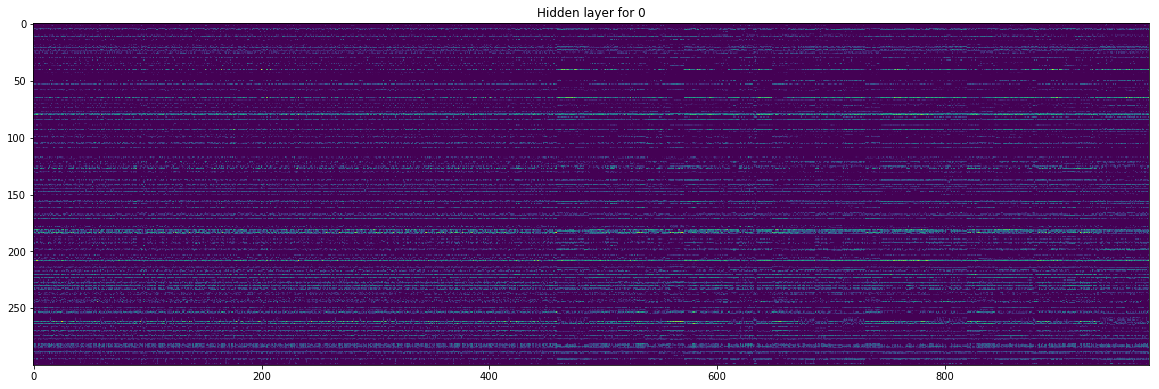

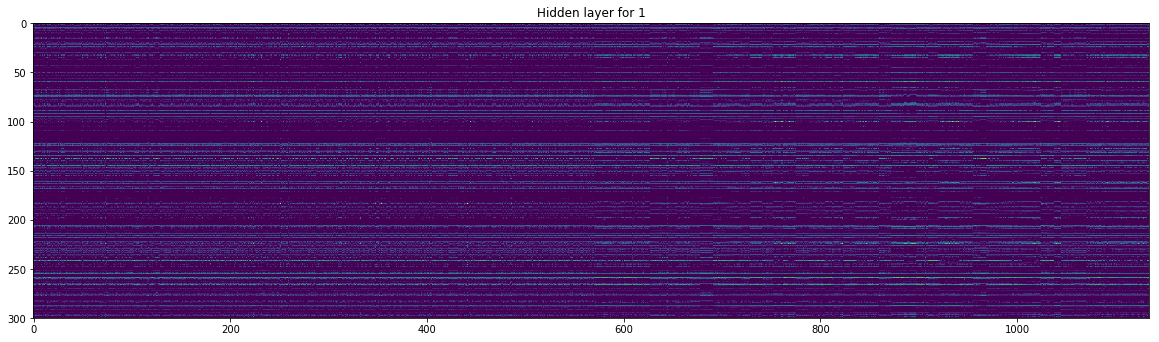

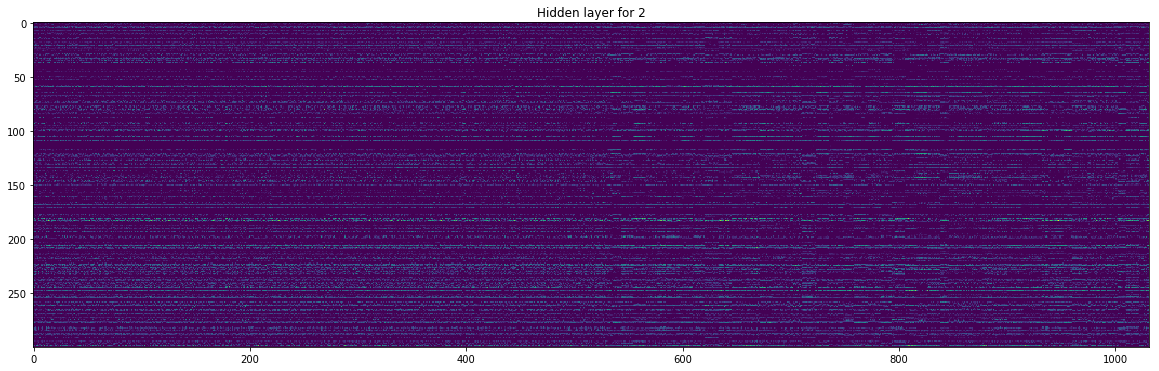

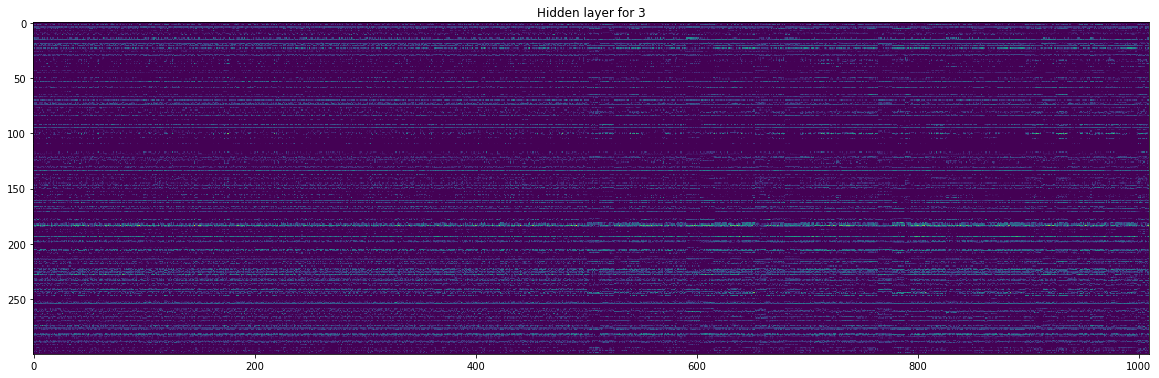

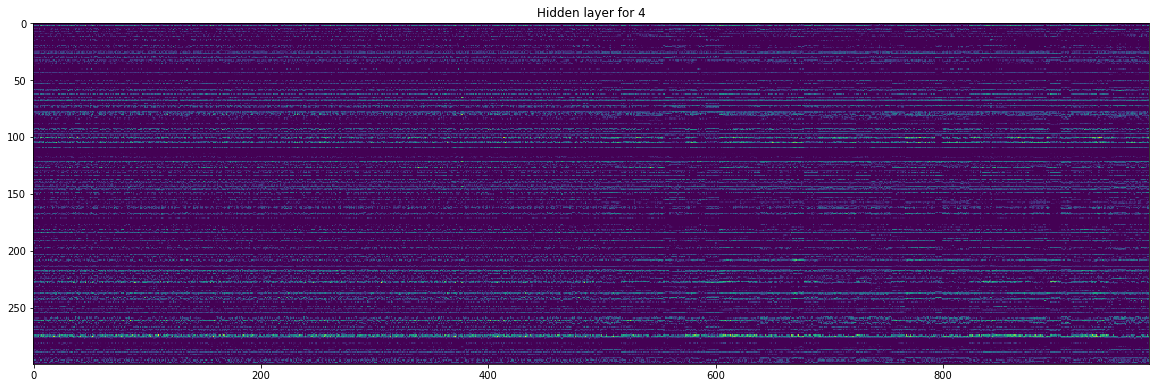

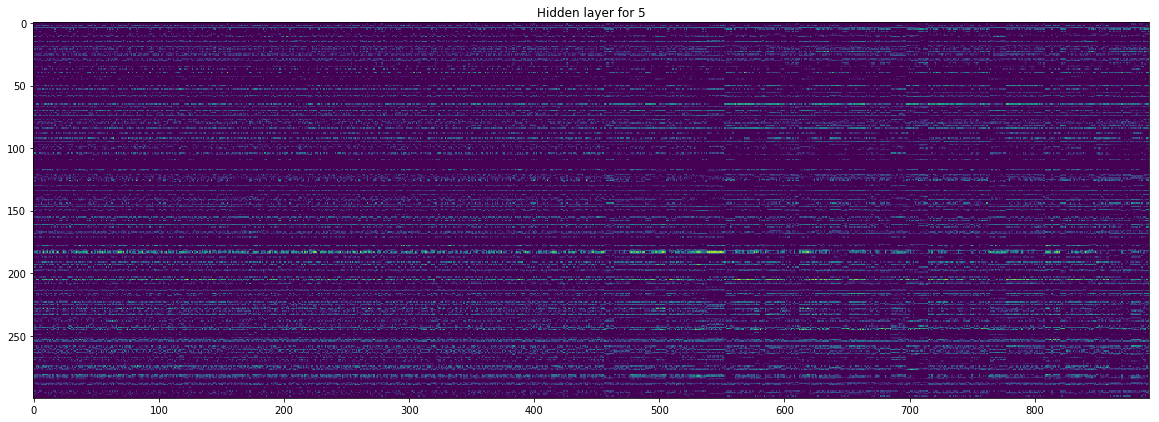

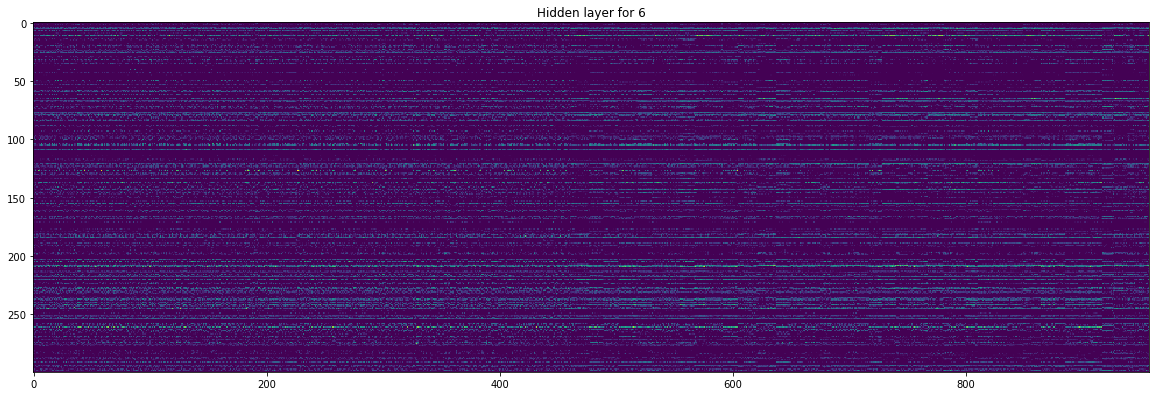

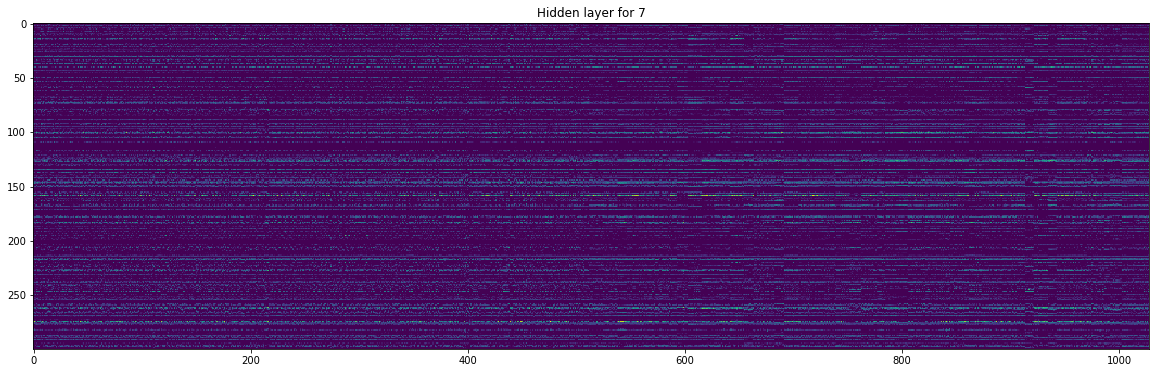

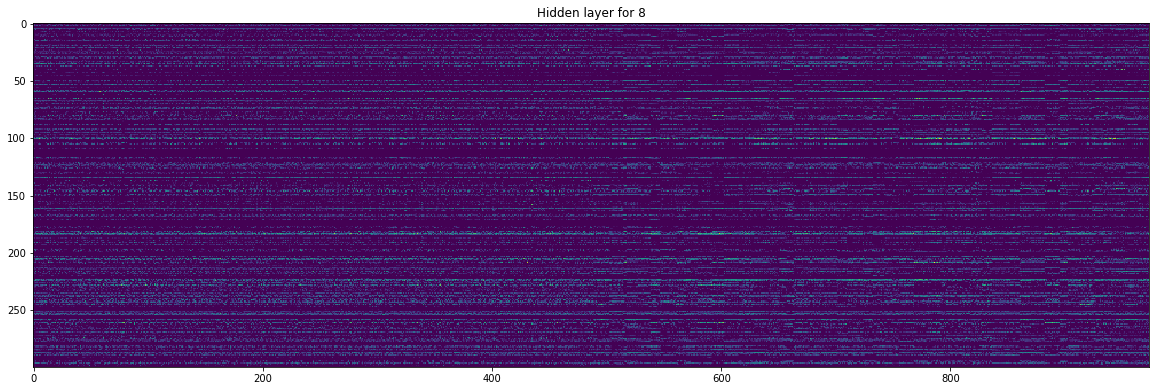

In [12]:
label_ind = mnist.test.labels == 1

for label in range(0,9):
    input_data = mnist.test.images[label_ind[:,label]]
    hidden_layer = sess.run(hidden_out, feed_dict = {x: input_data})
    
    plt.figure(figsize=(20,20))
    plt.imshow(hidden_layer.T)
    plt.title("Hidden layer for " + str(label))
    plt.show()

Now we want to define a new network to gradient descent the optimal input data to output the indicator output values for each label. We will do this on the trained network, to view what the "ideal" input image is for 0,1,...,9.

In [13]:
trained_W1 = sess.run(W1)
trained_b1 = sess.run(b1)
trained_W2 = sess.run(W2)
trained_b2 = sess.run(b2)

In [26]:
# Create graph with variables as input, and constants as weights
learning_rate = 0.1
penalty = 0.25
epochs = 1000

# now declare the output data placeholder - 10 digits
x = tf.Variable(tf.random_uniform([1,784], minval=0, maxval=1), tf.float32, name='input_image')
y = tf.placeholder(tf.float32, [None, 10], name="output_y")

W1 = tf.placeholder(tf.float32, [784, 300])
b1 = tf.placeholder(tf.float32, [300])
W2 = tf.placeholder(tf.float32, [300, 10])
b2 = tf.placeholder(tf.float32, [10])

# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(x, W1), b1)
hidden_out = tf.nn.relu(hidden_out)

# now calculate the hidden layer output - in this case, let's use a softmax activated
# output layer
y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))

y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1)) + penalty*tf.reduce_sum(x**2)

# add an optimiser
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Cost = 91.150665
Cost = 0.2178496
Cost = 0.21567653
Cost = 0.21568468
Cost = 0.2157131
Cost = 0.21571179
Cost = 0.21570373
Cost = 0.21568686
Cost = 0.21566693
Cost = 0.21565847
[[9.8138350e-01 3.2892204e-03 2.6503860e-03 6.1231667e-06 3.6774021e-05
  8.5096685e-03 3.1063685e-04 3.7350815e-03 1.6154981e-07 7.8431869e-05]]


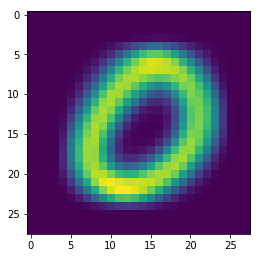

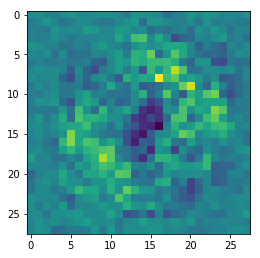

Cost = 97.5844
Cost = 0.053793095
Cost = 0.050526384
Cost = 0.05053156
Cost = 0.050527923
Cost = 0.050516117
Cost = 0.050525866
Cost = 0.050534684
Cost = 0.050515
Cost = 0.050521582
[[2.4400899e-05 9.9308228e-01 9.0056489e-04 2.6013369e-05 1.7795926e-04
  4.5434432e-03 7.3056901e-05 1.1597631e-03 1.0000313e-08 1.2434718e-05]]


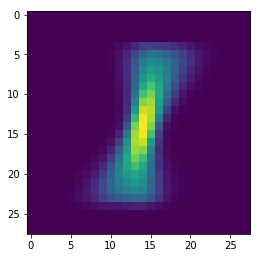

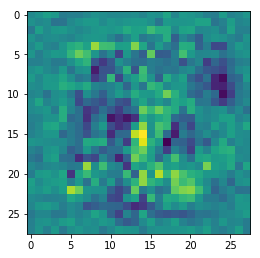

Cost = 88.647156
Cost = 0.12460284
Cost = 0.12150198
Cost = 0.1215102
Cost = 0.12151204
Cost = 0.1215028
Cost = 0.12149228
Cost = 0.121513635
Cost = 0.12150874
Cost = 0.121499166
[[1.8931802e-04 6.0845823e-03 9.8979962e-01 1.9004239e-05 4.8248083e-05
  3.0120451e-03 4.6416681e-04 3.7663744e-04 3.4366462e-08 6.2834024e-06]]


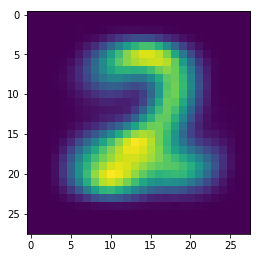

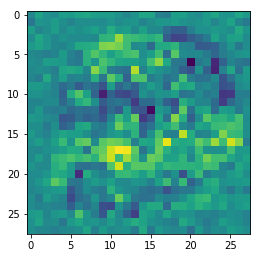

Cost = 70.62836
Cost = 0.20557395
Cost = 0.20370707
Cost = 0.20364366
Cost = 0.20357788
Cost = 0.20359585
Cost = 0.20374416
Cost = 0.2036695
Cost = 0.2036052
Cost = 0.20356931
[[2.7129539e-05 6.0719731e-03 6.5742957e-04 9.8601991e-01 1.3105170e-05
  5.3756516e-03 1.5104752e-06 1.5043655e-03 4.7537707e-08 3.2901196e-04]]


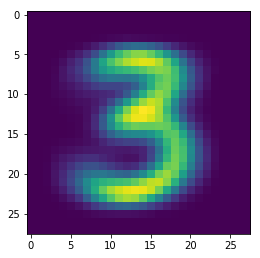

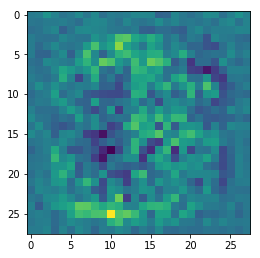

Cost = 86.56741
Cost = 0.16157761
Cost = 0.1598011
Cost = 0.15904175
Cost = 0.15959238
Cost = 0.15955442
Cost = 0.15922183
Cost = 0.15932718
Cost = 0.15914553
Cost = 0.15934257
[[2.2456932e-05 5.2017663e-03 3.4521575e-04 1.9177746e-06 9.8579073e-01
  5.7551572e-03 6.0484545e-05 2.7783688e-03 3.3002106e-08 4.3899239e-05]]


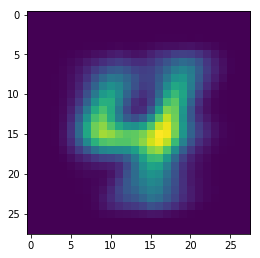

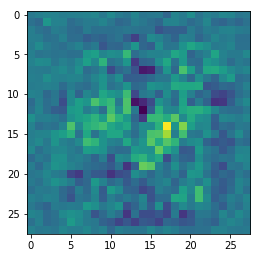

Cost = 79.289375
Cost = 0.027773002
Cost = 0.025469985
Cost = 0.025463175


In [ ]:
identity = np.identity(10)

for label in range(10):
    sess.run(init_op)
    batch = mnist.test.labels[mnist.test.labels[:,label] == 1]
    for epoch in range(epochs):
        _, c = sess.run([optimiser, cross_entropy], feed_dict={W1: trained_W1,
                                                        b1: trained_b1,
                                                        W2: trained_W2,
                                                        b2: trained_b2,
                                                        y: batch})
        if (epoch % 100 == 0):
            print("Cost = " + str(c))
    print(sess.run(y_clipped, feed_dict={W1: trained_W1,
                                b1: trained_b1,
                                W2: trained_W2,
                                b2: trained_b2,
                                y: batch}))
    trained_x = sess.run(x)
    plt.imshow(np.mean(mnist.test.images[mnist.test.labels[:,label] == 1], axis=0).reshape((28,28)))
    plt.show()
    plt.imshow(trained_x.reshape((28,28)))
    plt.show()